# Empirical Mode Decomposition Demo

This is my take on understanding the relatively new concept of Empirical Mode Decomposition (EMD), which is a technique of finding the components of a given signal using only the input data (the compound signal) that is provided and no other metadata. Unlike other transforms, including Fourier and Laplace, this method is purely data-dependant, which makes it an attraction for the current researchers in this field. EMD finds out the component signals of a given input signal using recursion, and calls them Intrinsic Mode Functions (IMFs), which are necessarily monotonous (having a single frequency).

In [7]:
# Importing the required modules and submodules

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate

### Dummy perfect signal
Let us make a signal with 3 cosine components linearly added together. This can act as our input signal with the required outputs (the IMFs) being the 3 components that are used to make this signal.

In [26]:
# The time parameter for constructing the demo signals
t = np.arange(0, 1, 0.0001)

# Component signals:
comp1 = np.cos(2 * np.pi * 2 * t)
comp2 = np.cos(2 * np.pi * 25 * t)
comp3 = np.sin(2 * np.pi * 100 * t)

# Input perfect signal
inp_sig = comp1 + comp2 + comp3

### Fig 1. The perfect input signal and its components

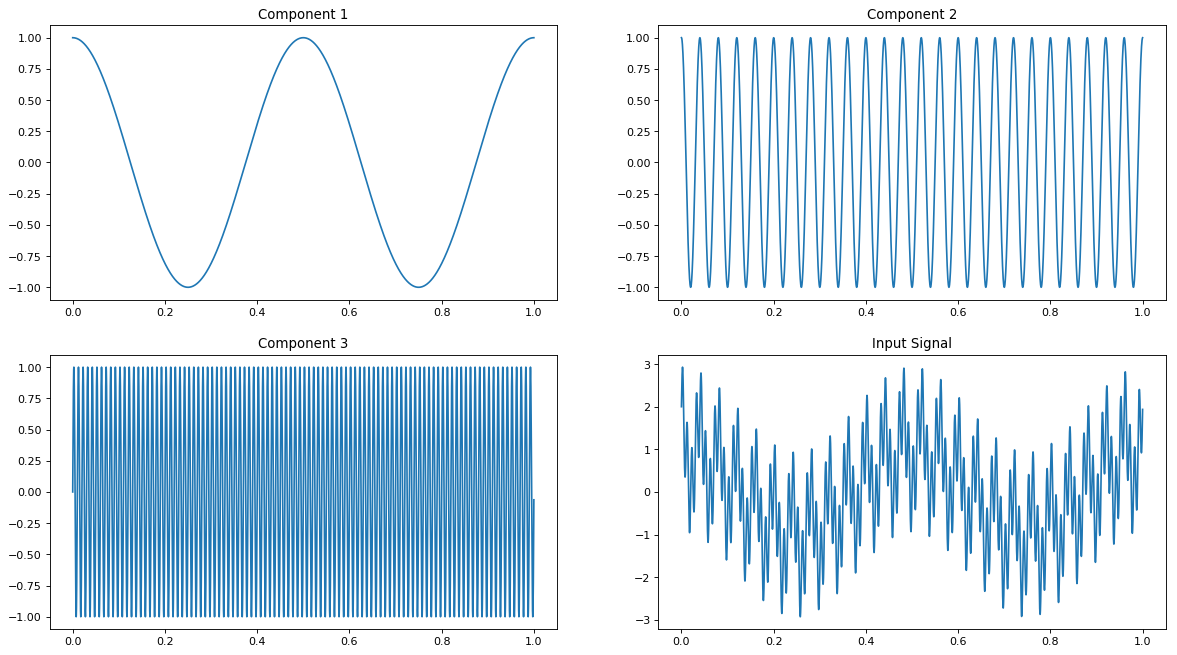

In [27]:
# Plotting out the input signal:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(t, comp1)
plt.title('Component 1')
plt.subplot(222)
plt.plot(t, comp2)
plt.title('Component 2')
plt.subplot(223)
plt.plot(t, comp3)
plt.title('Component 3')
plt.subplot(224)
plt.plot(t, inp_sig)
plt.title('Input Signal')
plt.show()

### Finding the relative extremas of the given input signal and the first residue
The extrema of the input signal are found first, separately for both the maxima and the minima. These datapoints are then interpolated to form the maxima and minima envelopes. The method below gives the indices of the input signal wherein the extrema occurs

In [65]:
# Iteration 1
sig_maxima_ind = signal.argrelextrema(inp_sig, np.greater)
sig_minima_ind = signal.argrelextrema(inp_sig, np.less)

Once the indices are known, the envelope data points can be retreived similar to retreiving data from an array

In [66]:
sig_maxima = [inp_sig[r] for r in sig_maxima_ind]
sig_minima = [inp_sig[r] for r in sig_minima_ind]

The envelope data points are then interpolated using b-splines to give the maximum and minimum envelopes

In [67]:
tck1 = interpolate.splrep(sig_maxima_ind[0], sig_maxima[0], s = 0)
max_interpolated = interpolate.splev(np.arange(0, len(t), 1), tck1, der = 0)

tck2 = interpolate.splrep(sig_minima_ind[0], sig_minima[0], s = 0)
min_interpolated = interpolate.splev(np.arange(0, len(t), 1), tck2, der = 0)

The mean of the envelopes is what we are interested in. The mean is then subtracted from the input signal to give our first residue. Note that since we have made a perfect signal, the residure already starts taking shape of one of the input signal components.

It is necessary to understand here that the mean is the measure by which we can estimate how many iterations are required to get our IMF; as since an IMF is monotonous (having single frequency), the mean would tend to 0 and therefore we would need as many iterations as possible to get the mean to 0. This is the whole idea of the recursive IMF function

In [68]:
mean1 = (max_interpolated + min_interpolated)/2.0
residue1 = inp_sig - mean1

### Fig 2. Initiating the IMF finding procedure

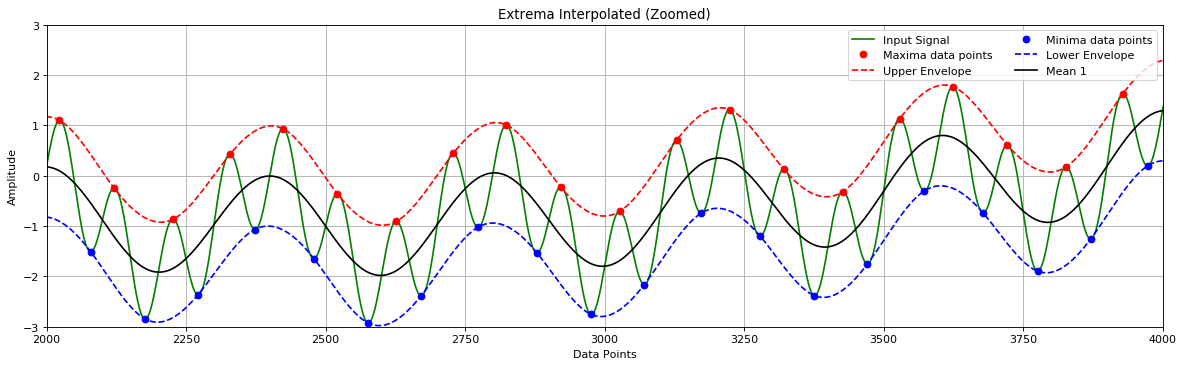

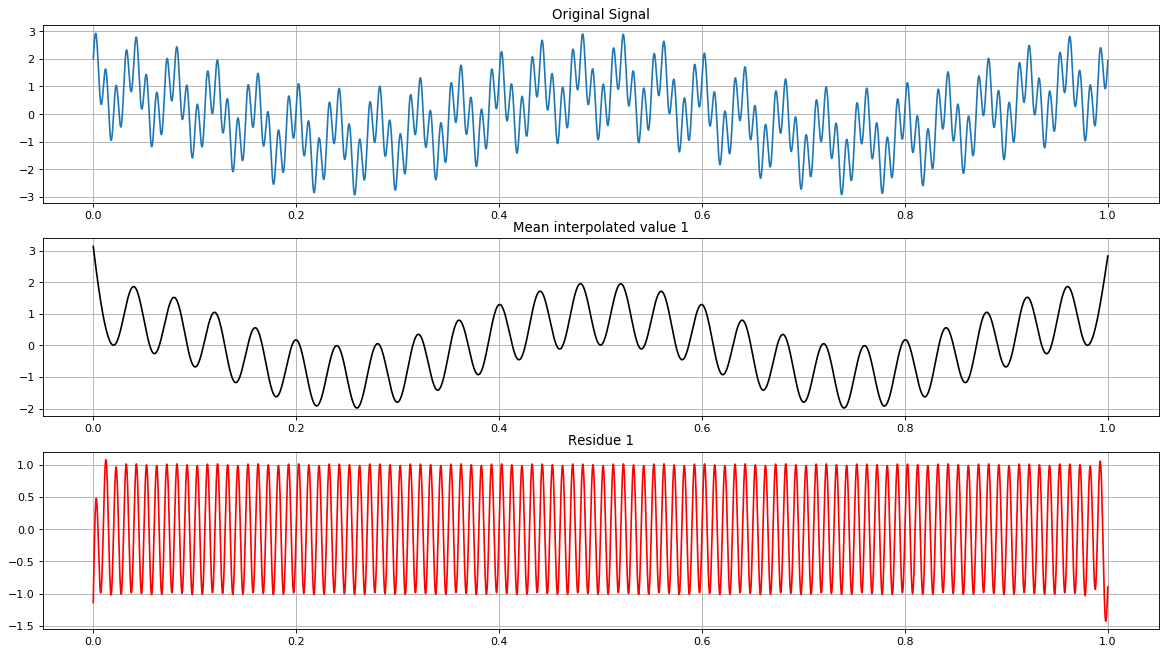

In [64]:
plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(inp_sig, 'g', label = 'Input Signal')
plt.plot(sig_maxima_ind[0], sig_maxima[0], 'ro', label = 'Maxima data points')
plt.plot(max_interpolated, 'r--', label = 'Upper Envelope')
plt.plot(sig_minima_ind[0], sig_minima[0], 'bo', label = 'Minima data points')
plt.plot(min_interpolated, 'b--', label = 'Lower Envelope')
plt.plot(mean1, 'k-', label = 'Mean 1')
plt.grid()
plt.title("Extrema Interpolated (Zoomed)")
plt.legend(loc='upper right', ncol=2)
plt.axis([2000, 4000, -3, 3])
plt.ylabel('Amplitude')
plt.xlabel('Data Points')
plt.show()

plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.plot(t, inp_sig, label = 'Input Signal')
plt.title('Original Signal')
plt.grid()

plt.subplot(312)
plt.plot(t, mean1, 'k', label = 'Mean 1')
plt.title('Mean interpolated value 1')
plt.grid()

plt.subplot(313)
plt.plot(t, residue1, 'r', label = 'Residue 1')
plt.title('Residue 1')
plt.grid()
plt.show()


### Reiterating to find the IMF
Note that the residue which was received in the last step is now acted upon as the input signal to do the further steps. This is the recursion that is required.

In this particular case, as we would see in Fig. 3, the IMF was found after 3 iterations; wherein the mean of the extrema envelopes were close to 0. This may not always be the case and the determination of stopping the IMF recursion should be done automatically with a given control statement of acceptable error. As is always the case, a lower magnitude of error will promise closer results with the cost of more number of iterations.

In [51]:
# Iteration 2
residue1_maxima_ind = signal.argrelextrema(residue1, np.greater)
residue1_minima_ind = signal.argrelextrema(residue1, np.less)

residue1_maxima = [residue1[r] for r in residue1_maxima_ind]
residue1_minima = [residue1[r] for r in residue1_minima_ind]

tck_residue1_max = interpolate.splrep(residue1_maxima_ind[0], residue1_maxima[0], s = 0)
upper_residue1 = interpolate.splev(np.arange(0, len(t), 1), tck_residue1_max, der = 0)

tck_residue1_min = interpolate.splrep(residue1_minima_ind[0], residue1_minima[0], s = 0)
lower_residue1 = interpolate.splev(np.arange(0, len(t), 1), tck_residue1_min, der = 0)

mean_residue1 = (upper_residue1 + lower_residue1)/2.0
residue2 = residue1 - mean_residue1

# Iteration 3
residue2_maxima_ind = signal.argrelextrema(residue2, np.greater)
residue2_minima_ind = signal.argrelextrema(residue2, np.less)

residue2_maxima = [residue2[r] for r in residue2_maxima_ind]
residue2_minima = [residue2[r] for r in residue2_minima_ind]

tck_residue2_max = interpolate.splrep(residue2_maxima_ind[0], residue2_maxima[0], s = 0)
upper_residue2 = interpolate.splev(np.arange(0, len(t), 1), tck_residue2_max, der = 0)

tck_residue2_min = interpolate.splrep(residue2_minima_ind[0], residue2_minima[0], s = 0)
lower_residue2 = interpolate.splev(np.arange(0, len(t), 1), tck_residue2_min, der = 0)

mean_residue2 = (upper_residue2 + lower_residue2)/2.0
imf1 = residue2 - mean_residue2

### Fig 3. Following iterations to find the IMF

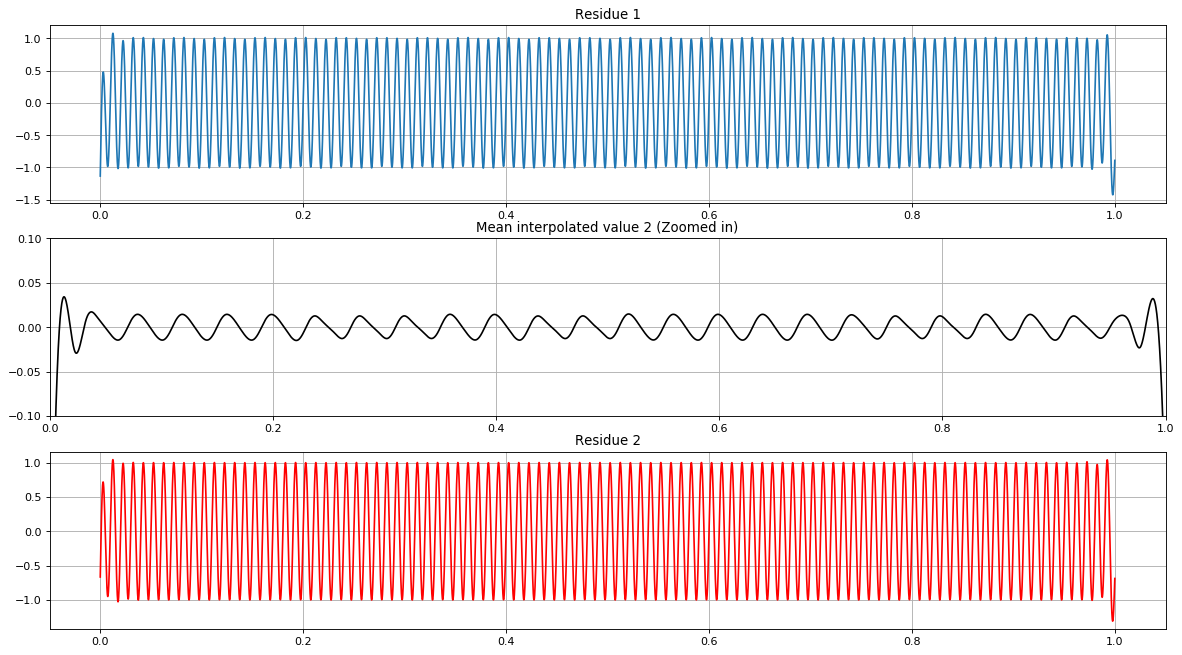

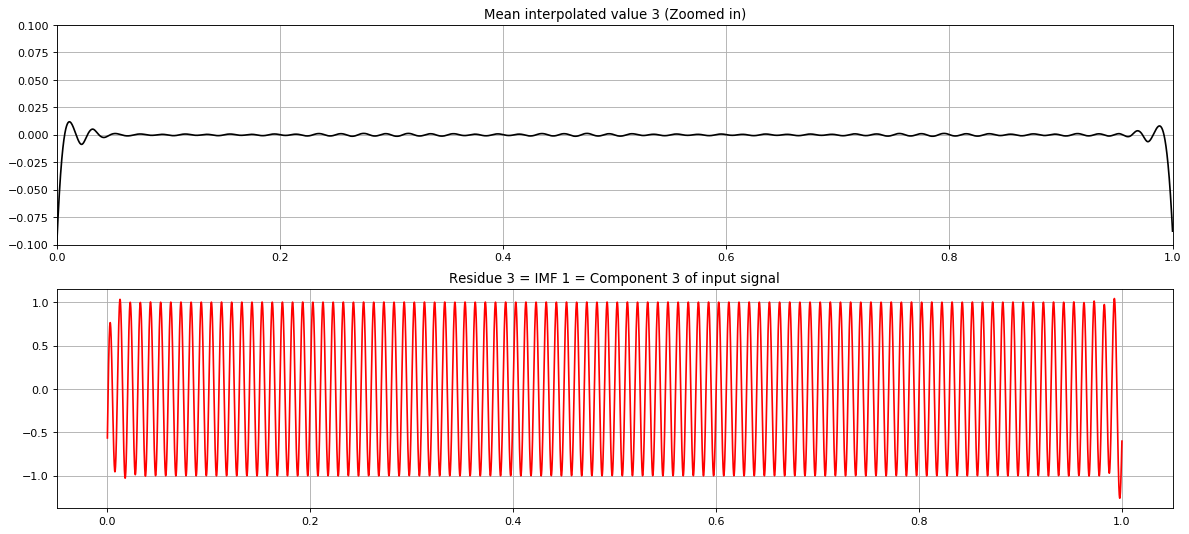

In [61]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.plot(t, residue1, label = 'Residue 1')
plt.title('Residue 1')
plt.grid()

plt.subplot(312)
plt.plot(t, mean_residue1, 'k', label = 'Mean')
plt.axis([0, 1, -0.1, 0.1])
plt.title('Mean interpolated value 2 (Zoomed in)')
plt.grid()

plt.subplot(313)
plt.plot(t, residue2, 'r', label = 'Residue 2')
plt.title('Residue 2')
plt.grid()
plt.show()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.plot(t, mean_residue2, 'k', label = 'Mean')
plt.title('Mean interpolated value 3 (Zoomed in)')
plt.axis([0, 1, -0.1, 0.1])
plt.grid()

plt.subplot(212)
plt.plot(t, imf1, 'r', label = 'IMF1')
plt.title('Residue 3 = IMF 1 = Component 3 of input signal')
plt.grid()
plt.show()


Once our IMF is found, it is subtracted from our input signal to reveal a signal which now only comprises of the other 2 components that were used to make it. This difference is then acted upon as the next input signal to find the other 2 IMFs

In [48]:
sig1 = inp_sig - imf1

### Fig 4. Subtracting the IMF from the input signal

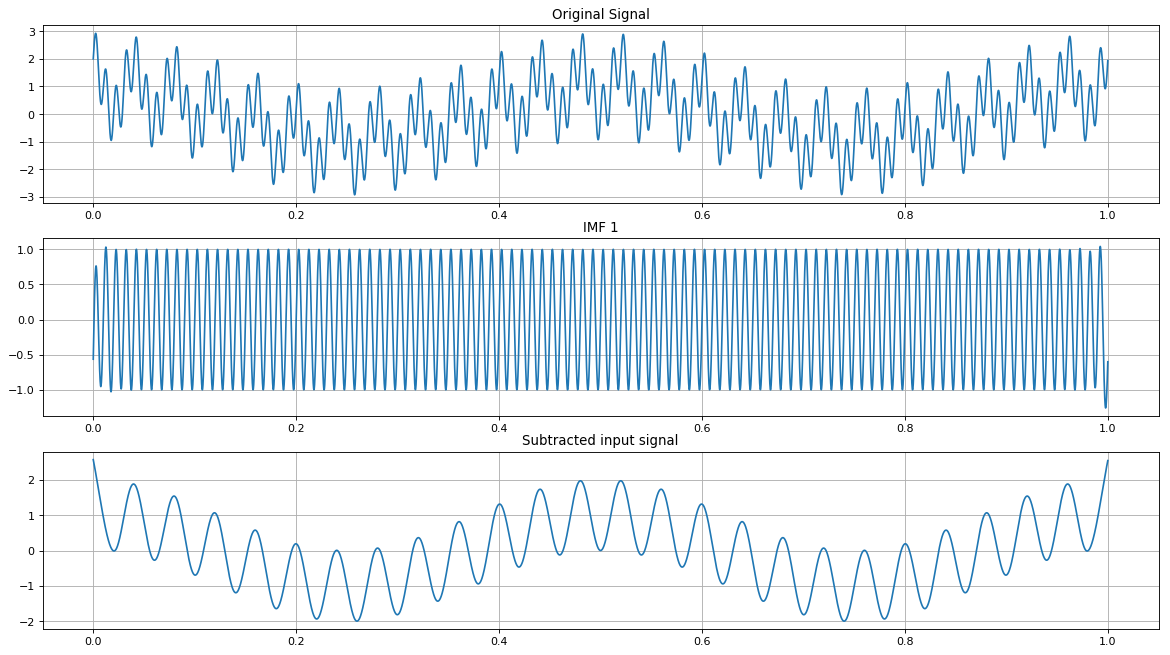

In [50]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.plot(t, inp_sig)
plt.grid()
plt.title('Original Signal')

plt.subplot(312)
plt.plot(t, imf1)
plt.grid()
plt.title('IMF 1')

plt.subplot(313)
plt.plot(t, sig1)
plt.grid()
plt.title('Subtracted input signal')

plt.show()

The difference is then subjected to finding the IMFs again